In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
from sklearn.manifold import TSNE

## Generate sintatic data

In [56]:
num_class_1 = 1000
num_class_2 = 1000

In [57]:
mean1 = np.array([1,1])
cov1 =  np.array([[1, 0.2],[0.2, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, num_class_1)
y1 = np.zeros((num_class_1))

In [58]:
mean2 = np.array([10,1])
cov2 =  np.array([[0.1, 0],[0, 0.1]])
X2 = np.random.multivariate_normal(mean2, cov2, num_class_2)
y2 = np.ones((num_class_2))

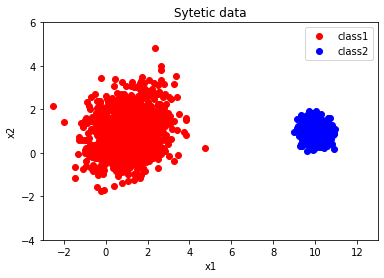

In [59]:
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.xlim([-3, 13])
plt.ylim([-4, 6])
plt.legend(['class1', 'class2'])
plt.title('Sytetic data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [60]:
X = np.concatenate((X1, X2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

In [70]:
t_SNE = TSNE(n_components = 2, perplexity = 30)

In [71]:
X_trans = t_SNE.fit_transform(X)

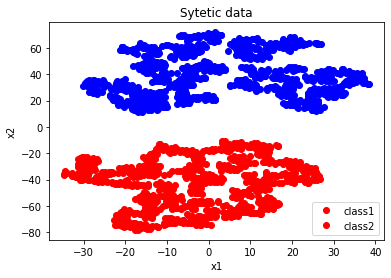

In [77]:
plt.plot(X_trans[np.where(y == 0),0], X_trans[np.where(y == 0),1], 'ro')
plt.plot(X_trans[np.where(y == 1),0], X_trans[np.where(y == 1),1], 'bo')
plt.legend(['class1', 'class2'])
plt.title('Sytetic data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()